# Notebook to compute power spectrum from the halo distribution

## Loading packages

In [2]:
import numpy as np
import MAS_library as MASL
import plotting_library as PL
from pylab import *
from matplotlib.colors import LogNorm
import matplotlib as plt

## Loading the halos data

In [5]:
z_redshifts= [3, 2, 1, 0.5, 0]

# Halofinder: Comumn 8,9,10 (starting from 0) --> X,Y,Z in  Mpc/h (comoving)
# Halofinder: Comumn 11,12,13 --> V_X,V_Y,V_Z in   km / s (physical, peculiar)

Halos_lcdm_z3 = np.loadtxt("./../Data//Halos_snapshots_Box/gevolution_boxsize_4032_ngrid_4608_lcdm_05062020/output/halos_snapshot/out_0.list")

Halos_lcdm_z3_sub = np.loadtxt("./../Data//Halos_snapshots_Box/gevolution_boxsize_4032_ngrid_4608_lcdm_05062020/output/halos_snapshot/out_0_subhalos.txt")


In [8]:
# np.shape(Halos_lcdm_z3)
# np.shape(Halos_lcdm_z3_sub)

### Computing the density fields

In [9]:
# input parameters
grid    = 500  
BoxSize = 4032 #Mpc/h
MAS     = 'CIC'

# define the array hosting the density field
delta = np.zeros((grid,grid,grid), dtype=np.float32)

In [13]:
# read the particle positions
Num =np.shape(Halos_lcdm_z3[:,8])[0];
posx = Halos_lcdm_z3[:Num,8]; posy=Halos_lcdm_z3[:Num,9];posz=Halos_lcdm_z3[:Num,10]; #Mpc/h 
pos = np.zeros((np.shape(posx)[0],3))
pos[:,0]=posx;
pos[:,1]=posy;
pos[:,2]=posz;
pos = pos.astype(np.float32)   #pos should be a numpy float array

## Density field

In [14]:
# compute density field
# do_RSD   = False
# axis     = 0 
MASL.MA(pos,delta,BoxSize,MAS)

In [15]:
%%time
mean_delta=np.mean(delta, dtype=np.float64);

CPU times: user 26.5 ms, sys: 1.39 ms, total: 27.9 ms
Wall time: 29.2 ms


In [16]:
%%time
# compute overdensity field
delta /= np.mean(delta, dtype=np.float64);  delta -= 1.0 

CPU times: user 68.5 ms, sys: 3.41 ms, total: 71.9 ms
Wall time: 71.3 ms


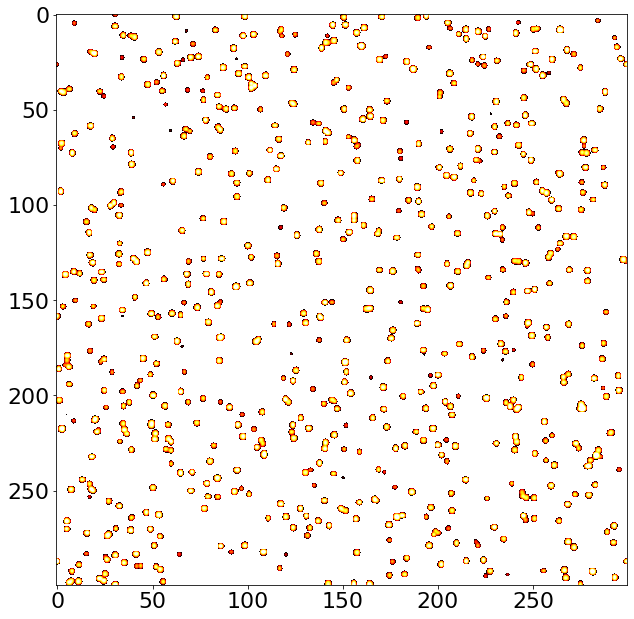

In [17]:
# fig = figure()    #create the figure
# plt.figure(figsize=(1,1))
import matplotlib.pyplot as plt

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
ax1 = fig.add_subplot(111) 
scale           = 'log' #'linear' or 'log'
min_overdensity = 0.5      #minimum overdensity to plot
max_overdensity = 50.0    #maximum overdensity to plot

# imshow(delta[:,:,0],cmap=get_cmap('hot'),interpolation='bicubic',norm = LogNorm(vmin=min_overdensity,vmax=max_overdensity))

image = imshow(delta[:,:,2],cmap=get_cmap('hot'),interpolation='bicubic',norm = LogNorm(vmin=min_overdensity,vmax=max_overdensity))

plt.savefig('test.png')


## Power spectrum

In [18]:
import Pk_library as PKL

In [19]:

threads = 4;
verbose = True
MAS="CIC"
axis=0
Pk = PKL.Pk(delta, BoxSize, axis,MAS, threads, verbose)


Computing power spectrum of the field...
Time to complete loop = 1.89
Time taken = 2.23 seconds


In [20]:
# 1D P(k)
k1D      = Pk.k1D      
Pk1D     = Pk.Pk1D     
Nmodes1D = Pk.Nmodes1D  

In [21]:
# k = np.arange(0.001,1,0.001)
# ks=0.05;
# ns=0.95;
# As = 1.9*1.e3
# power = As * (k/ks)**(ns-1);

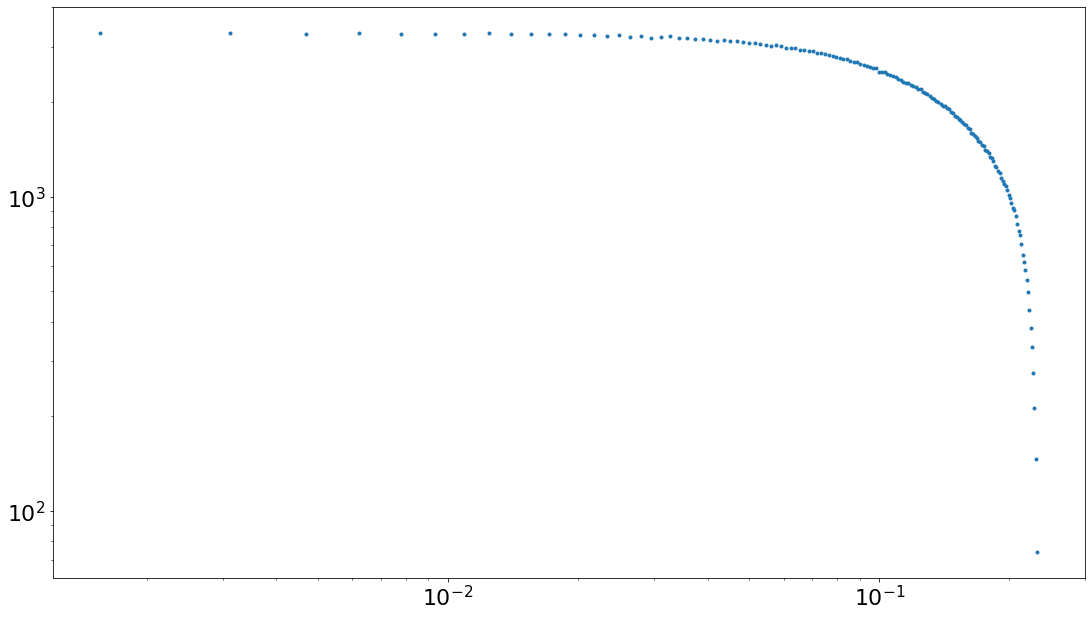

In [22]:
# plt.figure(figsize=(20,10))
import matplotlib as mpl
label_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)



loglog(k1D,Pk1D,".",lw=3)
# loglog(k,power,".",lw=3)
# matplotlib.xticks(fontsize=14, rotation=90)


## 3D power

In [23]:
k       = Pk.k3D
Pk0     = Pk.Pk[:,0] #monopole
Pk2     = Pk.Pk[:,1] #quadrupole
Pk4     = Pk.Pk[:,2] #hexadecapole
Pkphase = Pk.Pkphase #power spectrum of the phases
Nmodes  = Pk.Nmodes3D


(10.0, 10000000.0)

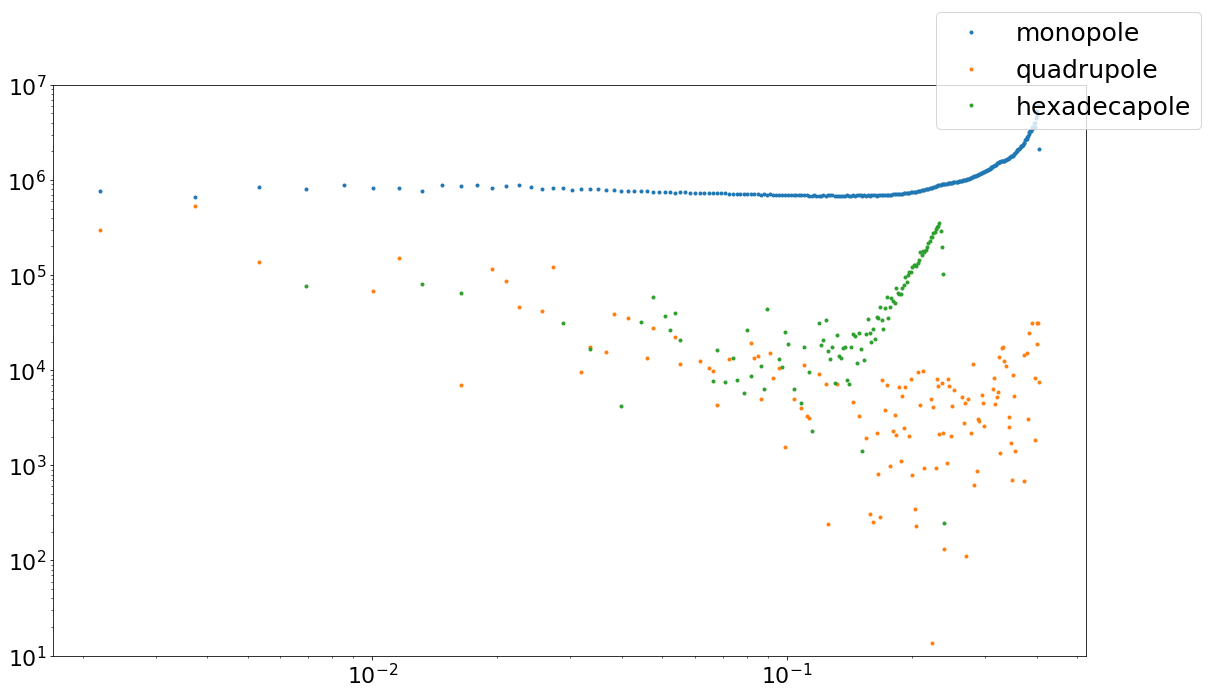

In [25]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

label_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

plt.loglog(k,Pk0,".",lw=3,label="monopole")
plt.loglog(k,Pk2,".",lw=3,label="quadrupole")
plt.loglog(k,Pk4,".",lw=3,label="hexadecapole")

fig.legend(fontsize=25)
plt.ylim(1.e1,1.e7)

# Correlation function

In [27]:
import numpy as np
import Pk_library as PKL

# CF parameters
BoxSize = 4032.0 #Mpc/h
MAS     = 'CIC'
threads = 16
axis    = 0

# compute the correlation function
CF     = PKL.Xi(delta, BoxSize, MAS, axis, threads)
r      = CF.r3D #radii in Mpc/h
xi0    = CF.xi[:,0]  #correlation function (monopole)
xi2    = CF.xi[:,1]  #correlation function (quadrupole)
xi4    = CF.xi[:,2]  #correlation function (hexadecapole)
Nmodes = CF.Nmodes3D #number of modes


Computing correlation function of the field...
Time to complete loop = 0.19
Time taken = 1.39 seconds


(-0.75, 0.75)

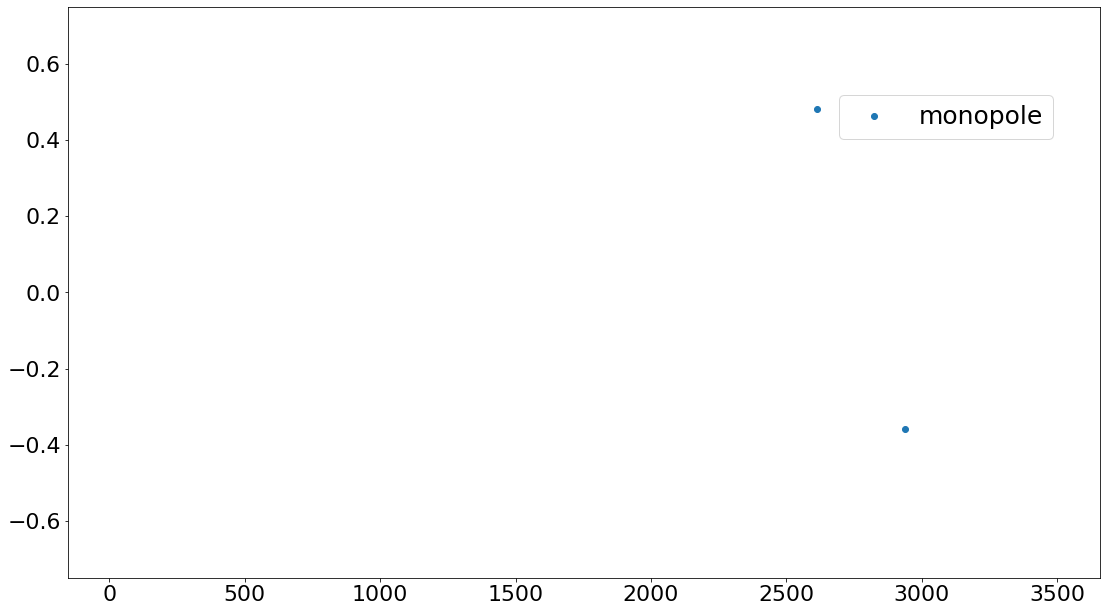

In [30]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

label_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

plt.plot(r,r**2*xi0,"o",lw=3,label="monopole")
# plt.plot(r,xi2,".",lw=3,label="quadrupole")
# plt.plot(r,xi4,".",lw=3,label="hexadecapole")

fig.legend(fontsize=25,bbox_to_anchor=(0.8,0.7))
plt.ylim(-0.75,0.75)
# plt.xscale('log')

# Void finder

In [ ]:
# import numpy as np
import void_library as VL

# parameters of the void finder
BoxSize    = 4032.0 #Mpc/h
threshold  = -0.1
Radii      = np.array([140], dtype=np.float32) #Mpc/h
threads1   = 2
threads2   = 2
void_field = True

# identify voids
V = VL.void_finder(delta, BoxSize, threshold, Radii, threads1, threads2, void_field=void_field)
void_pos    = V.void_pos    #positions of the void centers
void_radius = V.void_radius #radius of the voids
VSF_R       = V.Rbins       #bins in radius for VSF(void size function)
VSF         = V.void_vsf    #VSF (#voids/volume/dR)
# if void_field:  void_field  = V.void_field

In [ ]:
plt.plot(void_pos)

## Non-linear matter power

In [105]:
# import numpy as np
# import cosmology_library as CL

# z       = 1.0
# Omega_m = 0.3175
# Omega_l = 0.6825

# # k_lin, Pk_lin = np.loadtxt('my_Pk_file_z=0.txt', unpack=True)
# # Pk_nl = CL.Halofit_12(Omega_m, Omega_l, z, k_lin, Pk_lin)